# Time Series Analysis

In [1]:
import pandas as pd
import plotly.express as px
pd.options.plotting.backend = "plotly"

# import custom functions
import custom_functions.time_series as ts
import custom_functions.plot_styles as ps

ps.matplotlib_styles()

In [2]:
df = pd.read_csv(
    "../data/bikemi_csv/daily_outflow.csv",
    parse_dates=[0],
    index_col=[0]
)

daily_outflow = ts.create_ts_features(
    df, features=["day", "week", "month", "weekends", "holidays"]
)

daily_outflow.head()

,count,day,is_weekend,week,month,holiday
giorno_partenza,,,,,,
2019-01-01,831,2,0,1,1,Capodanno
2019-01-02,3512,3,0,1,1,None
2019-01-03,4126,4,0,1,1,None
2019-01-04,4201,5,0,1,1,None
2019-01-05,2875,6,1,1,1,None


# Visualise the data

Let's start by looking at the time series.

In [3]:
ts_plot = daily_outflow.plot(
    y="count",
    title="Daily Count of Trips in Milan",
    color_discrete_sequence=px.colors.qualitative.T10,
    labels = {
        "count": "",
        "giorno_partenza" : "date",
    }
)

ps.plotly_style(ts_plot)

The first thing that comes to mind is that the series displays a great variance. Clearly, the data is non-stationary: we see strong seasonal patterns. These are likely due to weekends and holidays. We can clearly see a trend, where the trip number increases until the middle of the year and then starts decreasing, reaching its lowest in the colder winter months. Let's explore them.

In [4]:
hist_weekends = daily_outflow.plot.bar(
    x = daily_outflow.index,
    y = "count",
    title="Bikes Daily Outflow (2019)",
    color = "is_weekend",
    color_discrete_sequence=px.colors.qualitative.T10,
    labels = {
        "value": "Number of trips",
        "giorno_partenza" : "date",
        "is_weekend": "weekend"
    }
)

ps.plotly_style(hist_weekends)

In [5]:
hist_holidays = daily_outflow.plot.bar(
    x = daily_outflow.index,
    y = "count",
    title="Bikes Daily Outflow (2019)",
    color = "holiday",
    color_discrete_sequence=px.colors.qualitative.T10,
    labels = {
        "count": "",
        "giorno_partenza" : ""
    }
)

ps.plotly_style(hist_holidays)

We can plot rolling means to get a better sense of these fluctuations.

In [45]:
rolling_7 = px.line(
    daily_outflow,
    x = daily_outflow.index,
    y = [
        daily_outflow["count"],
        daily_outflow["count"].rolling(7).mean(),
        daily_outflow["count"].rolling(7).std()
    ],
    labels={"variable": "", "giorno_partenza": "", "value": ""},
    color_discrete_sequence=px.colors.qualitative.T10,
    title = "BikeMi Daily Rentals - Rolling Mean and Standard Deviation (Window Size: 7)"
    ).update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
))

series_name = ["observed values", "rolling mean", "rolling stdev"]

for idx, name in enumerate(series_name):
    rolling_7.data[idx].name = name

ps.plotly_style(rolling_7)

In [43]:
rolling_30 = px.line(
    daily_outflow,
    x = daily_outflow.index,
    y = [
        daily_outflow["count"],
        daily_outflow["count"].rolling(30).mean(),
        daily_outflow["count"].rolling(30).std()
    ],
    labels={"variable": "", "giorno_partenza": ""},
    color_discrete_sequence=px.colors.qualitative.T10,
    title = "Rolling Mean and Standard Deviation (Window Size: 30)"
    ).update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
))

series_name = ["observed values", "rolling mean", "rolling stdev"]

for idx, name in enumerate(series_name):
    rolling_30.data[idx].name = name

ps.plotly_style(rolling_30)

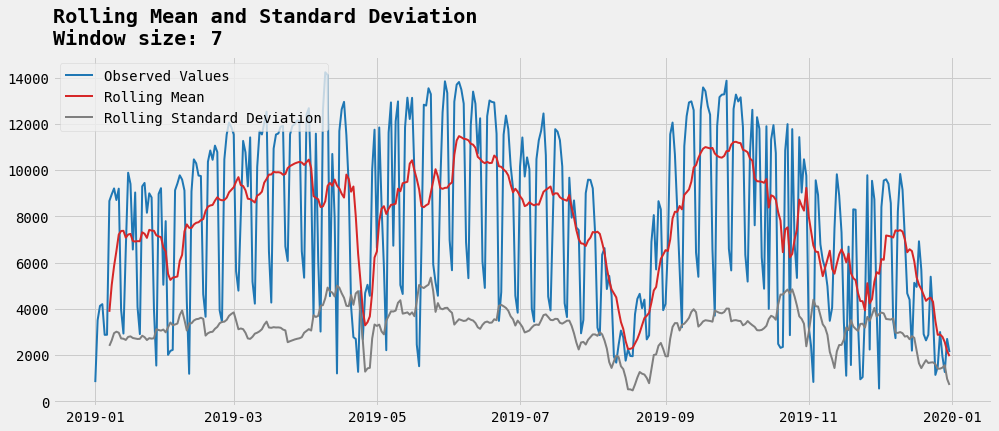

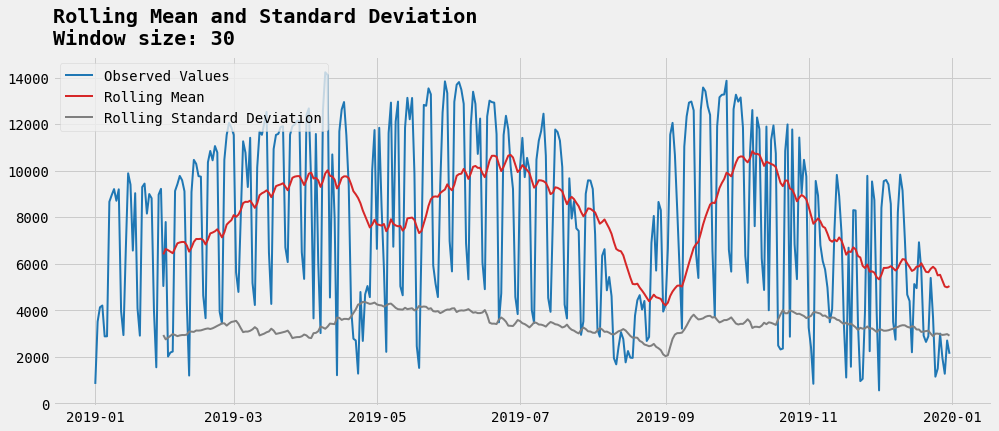

In [6]:
for lag in [7, 30]:
    ts.plt_rolling_statistics(daily_outflow["count"], lags=lag, statistics = ["mean", "std"])

We could plot the individual values for each month to display the difference in values. However, we can show these features better with a boxplot:

In [ ]:
month_boxplot = ts.subunits_boxplot(daily_outflow["count"], y = "count", time_subunit = "month")

month_boxplot

However, the most important source of variation clearly is the weekly seasonality. The boxplot function is designed to accept various time formats, so we can adapt it pretty quickly:

In [ ]:
weekly_boxplot = ts.subunits_boxplot(daily_outflow["count"], y = "count", time_subunit = "weekday")

weekly_boxplot

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# multiplicative decomposition


The results are obtained by first estimating the trend by applying a convolution filter to the data. The trend is then removed from the series and the average of this de-trended series for each period is the returned seasonal component.